In [1]:
# Importing packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading dataset

data = pd.read_csv("Data/drug200.csv")

In [3]:
#Exploring dataset

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
#Viewing value counts for categorical columns

categorical_variables = data.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(f"Value counts for {col}: ")
    print (data[col].value_counts())
    print("\n")

Value counts for Sex: 
M    104
F     96
Name: Sex, dtype: int64


Value counts for BP: 
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


Value counts for Cholesterol: 
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


Value counts for Drug: 
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64




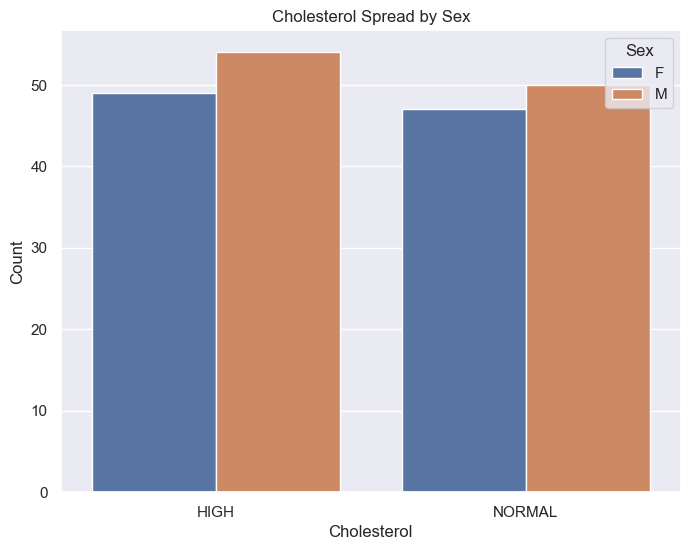

In [7]:
# Looking at the relationship between Sex and Cholesterol

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Cholesterol", hue="Sex")

# Add labels and a title
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.title("Cholesterol Spread by Sex")

# Show the plot
plt.show()


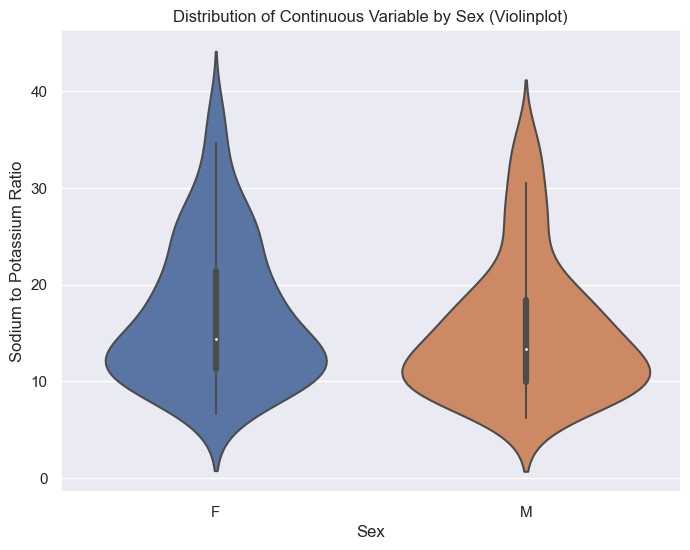

In [8]:
# Looking at the relationship between Sex and Na to K

# Create a violinplot
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x="Sex", y="Na_to_K")

# Add labels and a title
plt.xlabel("Sex")
plt.ylabel("Sodium to Potassium Ratio")
plt.title("Distribution of Continuous Variable by Sex (Violinplot)")

# Show the plot
plt.show()

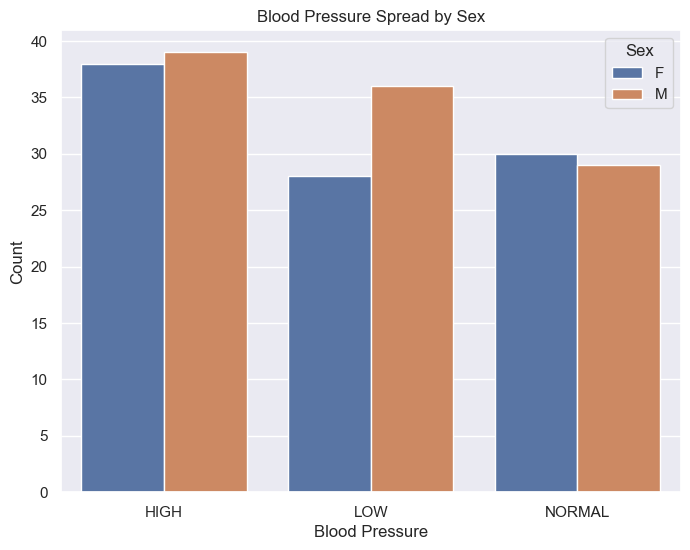

In [9]:
# Looking at the relationship between Sex and Blood Pressure

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="BP", hue="Sex")

# Add labels and a title
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.title("Blood Pressure Spread by Sex")

# Show the plot
plt.show()

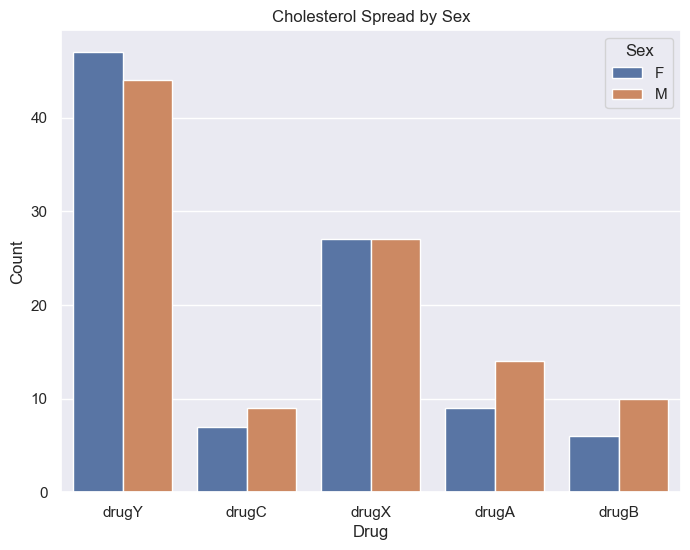

In [10]:
# Looking at the relationship between Sex and Drug Type

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Drug", hue="Sex")

# Add labels and a title
plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Cholesterol Spread by Sex")

# Show the plot
plt.show()

In [11]:
# Assigning numerical values to the categorical columns

#Creating a label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
data_processed = data
for col in categorical_variables:
    le.fit(data_processed[col])
    data_processed[col] = le.transform(data_processed[col])

for col in categorical_variables:
    print(f"Value counts for {col}: ")
    print (data_processed[col].value_counts())
    print("\n")


Value counts for Sex: 
1    104
0     96
Name: Sex, dtype: int64


Value counts for BP: 
0    77
1    64
2    59
Name: BP, dtype: int64


Value counts for Cholesterol: 
0    103
1     97
Name: Cholesterol, dtype: int64


Value counts for Drug: 
4    91
3    54
0    23
2    16
1    16
Name: Drug, dtype: int64




In [34]:
#Splitting data into the train and test set

from sklearn.model_selection import train_test_split

# Target
y = data_processed["Drug"]

# Features
X = data_processed[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]]

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)

In [36]:
# Create DMatrix objects

import xgboost as xgb
dtrain = xgb.DMatrix(train_X, label=train_y)
dtest = xgb.DMatrix(test_X, label=test_y)


In [37]:
# Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.02, 0.03, 0.04, 0.05, 0.06],
}

# Creating classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", seed=23)

# Finding best params
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(train_X, train_y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print(f'Best Params: {best_params}')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Params: {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.6}


In [38]:
# Making Predictions
y_pred = best_estimator.predict(test_X)

# Calculate accuracy or other evaluation metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(test_y, y_pred)
report = classification_report(test_y, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



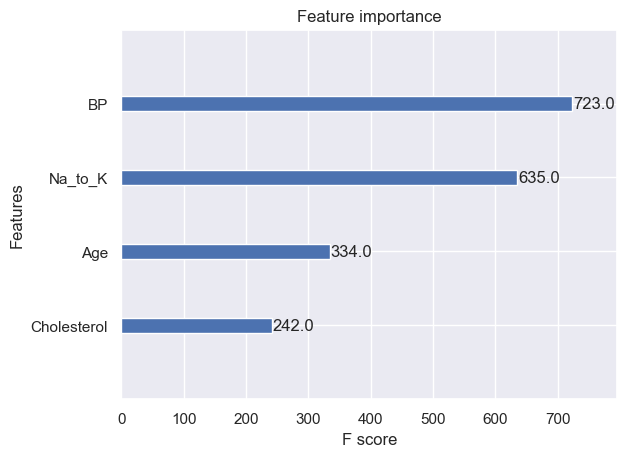

In [44]:
# Exploring importance of each feature

from xgboost import plot_importance

plot_importance(best_estimator)
plt.show()


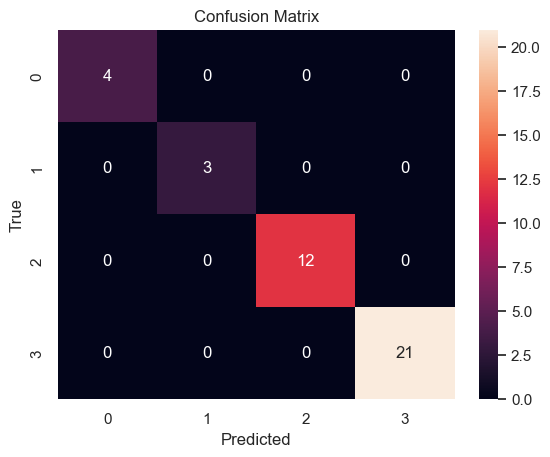

In [43]:
# Visualizing the performance of the classifier

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [46]:
# Exporting model

import pickle
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_estimator, model_file)

